@LabName    :digits-recognition  
@Author     :Сюй Цзэвень  
@Email      :xzw279135@gmail.com  
@Group      :11  
@Speciality :Информационная безопасность  

In [1]:
# Import package
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
from math import *

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import torch.utils.data as Data

from torch.autograd import Variable

import csv

In [2]:
# Import train data
train = pd.read_csv("train.csv")

In [4]:
# View imported train data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Turn the array into a high-dimensional tensor
# Switch to input mode
train_labels = torch.from_numpy(np.array(train.label[:]))

image_size = train.iloc[:, 1:].shape[1]
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)
train_data = torch.FloatTensor(np.array(train.iloc[:, 1:]).reshape((-1, 1, image_width, image_height))) / 255 
#灰度压缩，进行归一化 Grayscale compression, normalization processing
# The -1 in reshape means adaptive, so that we can better change the form of the data.
# reshape中的-1表示自适应，这样我们能让我们更好的变化数据的形式。

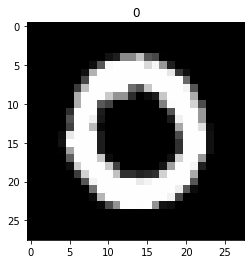

In [14]:
# Use matplotlib to view the processed results 使用matpolotlib 查看处理结果
plt.imshow(train_data[1].numpy().squeeze(), cmap = 'gray')
plt.title('%i' % train_labels[1])
plt.show()

In [15]:
# Import test data
test= pd.read_csv("test.csv")
test_data = torch.FloatTensor(np.array(test).reshape((-1, 1, image_width, image_height))) / 255

In [16]:
# View imported test data
test .head

<bound method NDFrame.head of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0  

In [17]:
#超参数 Hyperparameter
# Use a small batch of gradient descent optimization algorithm 使用的是小批梯度下降的优化算法
EPOCH = 1 #Number of training rounds
BATCH_SIZE = 10 #Number of samples
LR = 0.01 #Study rate

In [19]:
# Use "Data" to process data
trainData = Data.TensorDataset(train_data, train_labels) #用后会变成元组类型 It will become a Tuple type after use

train_loader = Data.DataLoader(
    dataset = trainData,
    batch_size = BATCH_SIZE,
    shuffle = True
)
# Data.TensorDataset can pack data
# Data.DataLoader can shuffle data and batch

In [20]:
#build CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # One Convolution layer
        self.conv1 = nn.Sequential(
            nn.Conv2d( # Input (1, 28, 28)
                in_channels = 1,      #1 channel
                out_channels = 16,    #out channels
                kernel_size = 5,      #Filter size
                stride = 1,           #stride size
                padding = 2           #padding
            ), # Output (16, 28, 28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2), # Output(16, 14, 14)
        )
        self.conv2 = nn.Sequential( # Input(16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2), # Two filters are used here, turning 16 layers into 32 layers
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2) # Output(32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10) #全连接层，Convert three-dimensional data into two-dimensional data and output

    def forward(self, x): #父类已定义，不能修改名字
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = F.softmax(self.out(x))
        return output

cnn = CNN()
optimzer = torch.optim.Adam(cnn.parameters(), lr = LR) #define optimezer
loss_func = nn.CrossEntropyLoss()   #loss function使用交叉嫡误差

print(cnn)  # view net architecture

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [21]:
# Training the model
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        output = cnn(b_x)
        loss = loss_func(output, b_y) #cross entropy loss
        #update W
        optimzer.zero_grad()
        loss.backward()
        optimzer.step()
        print('epoch%d' % (epoch + 1), '-', 'batch%d' % step, '-', 'loss%f' % loss) #View the training process
    print('No.%depoch is over' % (epoch + 1))

C:\Users\XU\Documents\myproject\Machine learning\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


epoch1 - batch0 - loss2.302772
epoch1 - batch1 - loss2.335181
epoch1 - batch2 - loss2.301166
epoch1 - batch3 - loss2.308435
epoch1 - batch4 - loss2.255478
epoch1 - batch5 - loss2.241182
epoch1 - batch6 - loss2.178203
epoch1 - batch7 - loss2.407394
epoch1 - batch8 - loss2.209106
epoch1 - batch9 - loss2.252047
epoch1 - batch10 - loss2.332704
epoch1 - batch11 - loss2.194351
epoch1 - batch12 - loss2.041839
epoch1 - batch13 - loss2.324788
epoch1 - batch14 - loss2.154142
epoch1 - batch15 - loss2.085136
epoch1 - batch16 - loss2.164742
epoch1 - batch17 - loss2.099961
epoch1 - batch18 - loss2.032818
epoch1 - batch19 - loss2.263722
epoch1 - batch20 - loss2.334950
epoch1 - batch21 - loss1.948113
epoch1 - batch22 - loss2.002958
epoch1 - batch23 - loss2.069684
epoch1 - batch24 - loss2.086726
epoch1 - batch25 - loss1.827991
epoch1 - batch26 - loss2.141185
epoch1 - batch27 - loss2.177617
epoch1 - batch28 - loss1.811221
epoch1 - batch29 - loss1.954718
epoch1 - batch30 - loss2.437576
epoch1 - batch31 -

In [22]:
# test
output = cnn(test_data[:])
#print(output)

result = torch.max(output, 1)[1].squeeze()
#print(result)

C:\Users\XU\Documents\myproject\Machine learning\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [23]:
# Define the saveResult function
def saveResult(result):
    with open('result.csv', 'w') as myFile:      
        myWriter = csv.writer(myFile)
        for i in result:
            tmp = []
            tmp.append(i)
            myWriter.writerow(tmp)

In [24]:
# Save result
saveResult(result.numpy())